In [8]:
import glob
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pb = pd.read_csv('public_leaderboard.csv',header=None)
pb.columns = ['experiment', 'rmse']
pb

,experiment,rmse
0,01-01,156.223821
1,01-02,153.679678
2,02-02,154.514020
3,02-07,154.046777
4,02-12,150.927453
5,02-13,152.187870
6,03-02,151.677019
7,04-02,150.810163
8,04-22,148.285239
9,04-24,149.735266


In [10]:
cv = []
for filepath in glob.glob(os.path.join('*', 'metrics.json')):
    experiment = os.path.split(filepath)[0]
    with open(filepath, 'r') as f:
        metrics = json.load(f)
    cv.append([experiment, metrics['valid_loss'], metrics['valid_losses_avg'], metrics['valid_losses_std']])
cv = pd.DataFrame(cv, columns=['experiment', 'valid_loss', 'valid_losses_avg', 'valid_losses_std'])
cv

,experiment,valid_loss,valid_losses_avg,valid_losses_std
0,01-01,199.964769,108.884375,2.360160
1,01-02,199.099051,106.999095,3.006433
2,01-03,203.720097,122.039748,2.513364
3,02-01,199.499959,108.459800,2.652697
4,02-02,199.275750,106.721206,2.897792
5,02-03,199.886414,108.494788,2.910522
6,02-04,203.776117,122.235166,2.598303
7,02-05,207.915460,136.179659,2.624863
8,02-06,199.394564,108.022102,2.810462
9,02-07,199.303432,106.417679,2.734128


In [11]:
cv.sort_values('valid_loss').head(1)

,experiment,valid_loss,valid_losses_avg,valid_losses_std
48,05-01,195.208824,114.601035,2.06314


In [12]:
cv_pb = pd.merge(cv, pb, how='left')
cv_pb

,experiment,valid_loss,valid_losses_avg,valid_losses_std,rmse
0,01-01,199.964769,108.884375,2.360160,156.223821
1,01-02,199.099051,106.999095,3.006433,153.679678
2,01-03,203.720097,122.039748,2.513364,NaN
3,02-01,199.499959,108.459800,2.652697,NaN
4,02-02,199.275750,106.721206,2.897792,154.514020
5,02-03,199.886414,108.494788,2.910522,NaN
6,02-04,203.776117,122.235166,2.598303,NaN
7,02-05,207.915460,136.179659,2.624863,NaN
8,02-06,199.394564,108.022102,2.810462,NaN
9,02-07,199.303432,106.417679,2.734128,154.046777


,valid_loss,valid_losses_avg,valid_losses_std,rmse
valid_loss,1.000000,0.725634,0.411441,0.922427
valid_losses_avg,0.725634,1.000000,-0.101410,-0.065232
valid_losses_std,0.411441,-0.101410,1.000000,0.358223
rmse,0.922427,-0.065232,0.358223,1.000000


<Figure size 648x648 with 0 Axes>

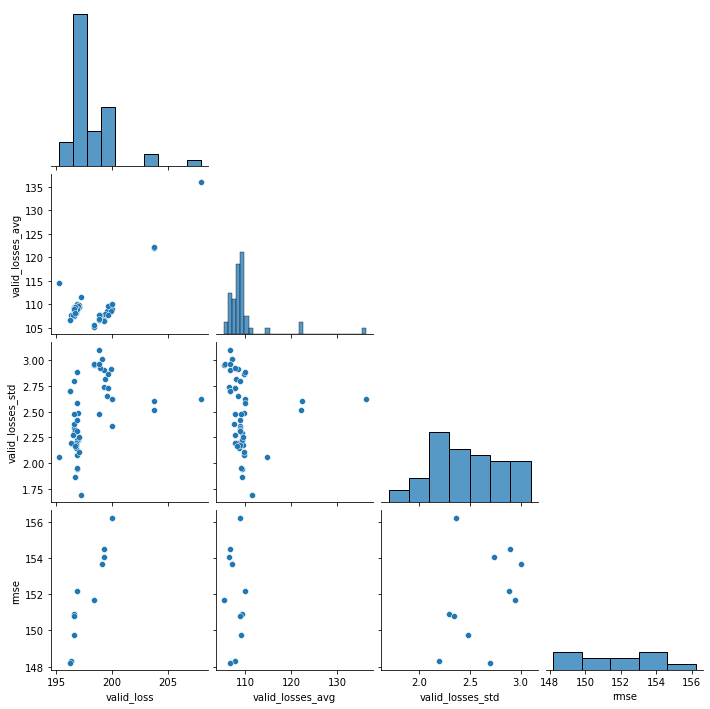

In [13]:
plt.figure(figsize=(9, 9))
sns.pairplot(cv_pb, corner=True)
cv_pb.corr()